In [2]:
# use R to change path to ~/cdai/SpliFi/analysis if current working path is not

setwd("~/cdai/SpliFi/analysis")


In [3]:
suppressMessages(library(tidyverse))
suppressMessages(library(glue))
suppressMessages(library(data.table))
suppressMessages(library(cowplot))

In [4]:
theme_set(theme_cowplot())

In [5]:
library(furrr)
plan(multisession, workers = 6)

Loading required package: future



In [6]:
options(repr.plot.width = 8, repr.plot.height=10, repr.plot.res = 180)

In [7]:
tissues  <- dir('../code/results/pheno/noisy/GTEx')
tissues  <- tissues[-which(tissues %in% c("Bladder", "Kidney-Medulla"))]
length(tissues)
tissues

[1] 49

[1] "Adipose-Subcutaneous"                
 [2] "Adipose-Visceral_Omentum_"           
 [3] "AdrenalGland"                        
 [4] "Artery-Aorta"                        
 [5] "Artery-Coronary"                     
 [6] "Artery-Tibial"                       
 [7] "Brain-Amygdala"                      
 [8] "Brain-Anteriorcingulatecortex_BA24_" 
 [9] "Brain-Caudate_basalganglia_"         
[10] "Brain-CerebellarHemisphere"          
[11] "Brain-Cerebellum"                    
[12] "Brain-Cortex"                        
[13] "Brain-FrontalCortex_BA9_"            
[14] "Brain-Hippocampus"                   
[15] "Brain-Hypothalamus"                  
[16] "Brain-Nucleusaccumbens_basalganglia_"
[17] "Brain-Putamen_basalganglia_"         
[18] "Brain-Spinalcord_cervicalc-1_"       
[19] "Brain-Substantianigra"               
[20] "Breast-MammaryTissue"                
[21] "Cells-Culturedfibroblasts"           
[22] "Cells-EBV-transformedlymphocytes"    
[23] "Colon-Sigmoid"                       
[24] "Colon-Transverse"                    
[25] "Esophagus-GastroesophagealJunction"  
[26] "Esophagus-Mucosa"                    
[27] "Esophagus-Muscularis"                
[28] "Heart-AtrialAppendage"               
[29] "Heart-LeftVentricle"                 
[30] "Kidney-Cortex"                       
[31] "Liver"                               
[32] "Lung"                                
[33] "MinorSalivaryGland"                  
[34] "Muscle-Skeletal"                     
[35] "Nerve-Tibial"                        
[36] "Ovary"                               
[37] "Pancreas"                            
[38] "Pituitary"                           
[39] "Prostate"                            
[40] "Skin-NotSunExposed_Suprapubic_"      
[41] "Skin-SunExposed_Lowerleg_"           
[42] "SmallIntestine-TerminalIleum"        
[43] "Spleen"                              
[44] "Stomach"                             
[45] "Testis"                              
[46] "Thyroid"                             
[47] "Uterus"                              
[48] "Vagina"                              
[49] "WholeBlood"

Processed these GTEx tissues:

In [8]:
#| include: true
print(glue("Number of tissues: {length(tissues)}"))
print(glue("Tissues: {str_wrap(paste(tissues, collapse = ', '), 120)}"))

Number of tissues: 49
Tissues: Adipose-Subcutaneous, Adipose-Visceral_Omentum_, AdrenalGland, Artery-Aorta, Artery-Coronary, Artery-Tibial,
Brain-Amygdala, Brain-Anteriorcingulatecortex_BA24_, Brain-Caudate_basalganglia_, Brain-CerebellarHemisphere,
Brain-Cerebellum, Brain-Cortex, Brain-FrontalCortex_BA9_, Brain-Hippocampus, Brain-Hypothalamus,
Brain-Nucleusaccumbens_basalganglia_, Brain-Putamen_basalganglia_, Brain-Spinalcord_cervicalc-1_, Brain-Substantianigra,
Breast-MammaryTissue, Cells-Culturedfibroblasts, Cells-EBV-transformedlymphocytes, Colon-Sigmoid, Colon-Transverse,
Esophagus-GastroesophagealJunction, Esophagus-Mucosa, Esophagus-Muscularis, Heart-AtrialAppendage, Heart-LeftVentricle,
Kidney-Cortex, Liver, Lung, MinorSalivaryGland, Muscle-Skeletal, Nerve-Tibial, Ovary, Pancreas, Pituitary, Prostate,
Skin-NotSunExposed_Suprapubic_, Skin-SunExposed_Lowerleg_, SmallIntestine-TerminalIleum, Spleen, Stomach, Testis,
Thyroid, Uterus, Vagina, WholeBlood


In [9]:

computeUnprodRatio <- function(tissue_rds) {

    introns <- readRDS(tissue_rds)
    datacols <- names(introns)[5:ncol(introns)]
    # remove clu_type == N, clusters with only unproductive introns
    introns  <- introns[clu_type != 'N']
    # total reads (by sample)
    totals <- colSums(introns[, ..datacols])
    # unproudctive reads (by sample)
    unprod <- introns[intron_type == 'N', ..datacols] %>% colSums
    # unproductive reads / total reads
    if (all(names(totals) == names(unprod))) {
        unprod_ratio <- round(unprod / totals, 5)
    } else {
        stop('samples of totals and unprod are not the same')
    }

    return(unprod_ratio)

}

In [10]:
#tissues
tissues_rds <- glue('/project2/yangili1/cdai/SpliFi/data/ExtractFractions/GTEx/{tissues}.numerators_constcounts.noise_by_intron.rds')
names(tissues_rds) <- tissues
print(glue("{seq_along(tissues_rds)}:{tissues_rds}"))

1:/project2/yangili1/cdai/SpliFi/data/ExtractFractions/GTEx/Adipose-Subcutaneous.numerators_constcounts.noise_by_intron.rds
2:/project2/yangili1/cdai/SpliFi/data/ExtractFractions/GTEx/Adipose-Visceral_Omentum_.numerators_constcounts.noise_by_intron.rds
3:/project2/yangili1/cdai/SpliFi/data/ExtractFractions/GTEx/AdrenalGland.numerators_constcounts.noise_by_intron.rds
4:/project2/yangili1/cdai/SpliFi/data/ExtractFractions/GTEx/Artery-Aorta.numerators_constcounts.noise_by_intron.rds
5:/project2/yangili1/cdai/SpliFi/data/ExtractFractions/GTEx/Artery-Coronary.numerators_constcounts.noise_by_intron.rds
6:/project2/yangili1/cdai/SpliFi/data/ExtractFractions/GTEx/Artery-Tibial.numerators_constcounts.noise_by_intron.rds
7:/project2/yangili1/cdai/SpliFi/data/ExtractFractions/GTEx/Brain-Amygdala.numerators_constcounts.noise_by_intron.rds
8:/project2/yangili1/cdai/SpliFi/data/ExtractFractions/GTEx/Brain-Anteriorcingulatecortex_BA24_.numerators_constcounts.noise_by_intron.rds
9:/project2/yangili1/c

In [11]:
ratios <- map(tissues_rds, computeUnprodRatio, .progress = TRUE)

 ■■                                 2% |  ETA:  6m

 ■■                                 4% |  ETA:  5m

 ■■■                                6% |  ETA:  4m

 ■■■                                8% |  ETA:  3m

 ■■■■                              10% |  ETA:  3m

 ■■■■■                             12% |  ETA:  3m

 ■■■■■                             14% |  ETA:  3m

 ■■■■■■■                           18% |  ETA:  2m

 ■■■■■■■                           20% |  ETA:  2m

 ■■■■■■■■                          22% |  ETA:  2m

 ■■■■■■■■■                         27% |  ETA:  2m

 ■■■■■■■■■■                        29% |  ETA:  2m

 ■■■■■■■■■■■                       33% |  ETA:  2m

 ■■■■■■■■■■■                       35% |  ETA:  2m

 ■■■■■■■■■■■■                      37% |  ETA:  1m

 ■■■■■■■■■■■■■                     41% |  ETA:  1m

 ■■■■■■■■■■■■■■                    43% |  ETA:  1m

 ■■■■■■■■■■■■■■                    45% |  ETA:  1m

 ■■■■■■■■■■■■■■■                   47% |  ETA:  1m

 ■■■■■■■■■■■

In [ ]:
ratios <- imap_dfr(
    ratios,
    \(x, y) enframe(x, "sample", "unprodRatio") %>% add_column(tissue = y)
)

In [ ]:
ratios  <- as.data.table(ratios) %>%
    .[, .(sample, unprodRatio, nsample = uniqueN(sample)), by = tissue]

In [ ]:
ratios %>% head

tissue,sample,unprodRatio,nsample
<chr>,<chr>,<dbl>,<int>
Adipose-Subcutaneous,GTEX-1117F,0.00652,663
Adipose-Subcutaneous,GTEX-111CU,0.00441,663
Adipose-Subcutaneous,GTEX-111FC,0.00527,663
Adipose-Subcutaneous,GTEX-111VG,0.00511,663
Adipose-Subcutaneous,GTEX-111YS,0.00552,663
Adipose-Subcutaneous,GTEX-1122O,0.00528,663


In [ ]:
ratios[, .(median_prod_ratio = median(unprodRatio)), by = tissue][order(-median_prod_ratio)]

tissue,median_prod_ratio
<chr>,<dbl>
Testis,0.010950
Brain-Cerebellum,0.008630
Brain-CerebellarHemisphere,0.008100
Brain-Spinalcord_cervicalc-1_,0.007440
Prostate,0.007040
Thyroid,0.006730
Nerve-Tibial,0.006460
Spleen,0.006280
Brain-Substantianigra,0.006070


In [ ]:
median_unprod_ratio_all_gtex <- ratios[tissue != "EUR", .(median_prod_ratio = median(unprodRatio)), by = tissue
    ][order(-median_prod_ratio)] %>% 
    pull(median_prod_ratio) %>% median

median_unprod_ratio_all_gtex

[1] 0.005215

In [ ]:
p1  <- ratios %>% 
    ggplot() + geom_boxplot(aes(x = forcats::fct_reorder(tissue, -unprodRatio), y = unprodRatio, col = tissue), width = .3) +
        scale_y_continuous(labels = scales::percent_format(accuracy = .1)) +
        geom_hline(yintercept = median_unprod_ratio_all_gtex, linetype = 2, col = "black") +
        geom_text(aes(x = 45, y = median_unprod_ratio_all_gtex*1.01, label = median_unprod_ratio_all_gtex %>% scales::percent(accuracy = .01)), 
                  hjust = 0, vjust = 0, col = "black", size = 6) +
        labs(x = NULL, y = "Fraction of unproductive reads", 
             title = "Fraction of unproductive reads by tissue",
             subtitle = "clusters with ONLY unprod. introns are excluded from both numerators and denominators",
            ) +
        theme(legend.position = "none", axis.text.x = element_text(angle = 90, hjust = 1))


In [ ]:
p2 <- ratios[, .(nsample = uniqueN(sample)), by = tissue] %>% 
    ggplot() + geom_col(aes(x = forcats::fct_reorder(tissue, -nsample), y = nsample, fill = tissue), width = .3) +
        scale_y_continuous(labels = scales::comma_format()) +
        labs(x = NULL, y = "Number of samples", 
             title = "Number of samples by tissue",
            ) +
        theme(legend.position = "none", axis.text.x = element_text(angle = 90, hjust = 1))

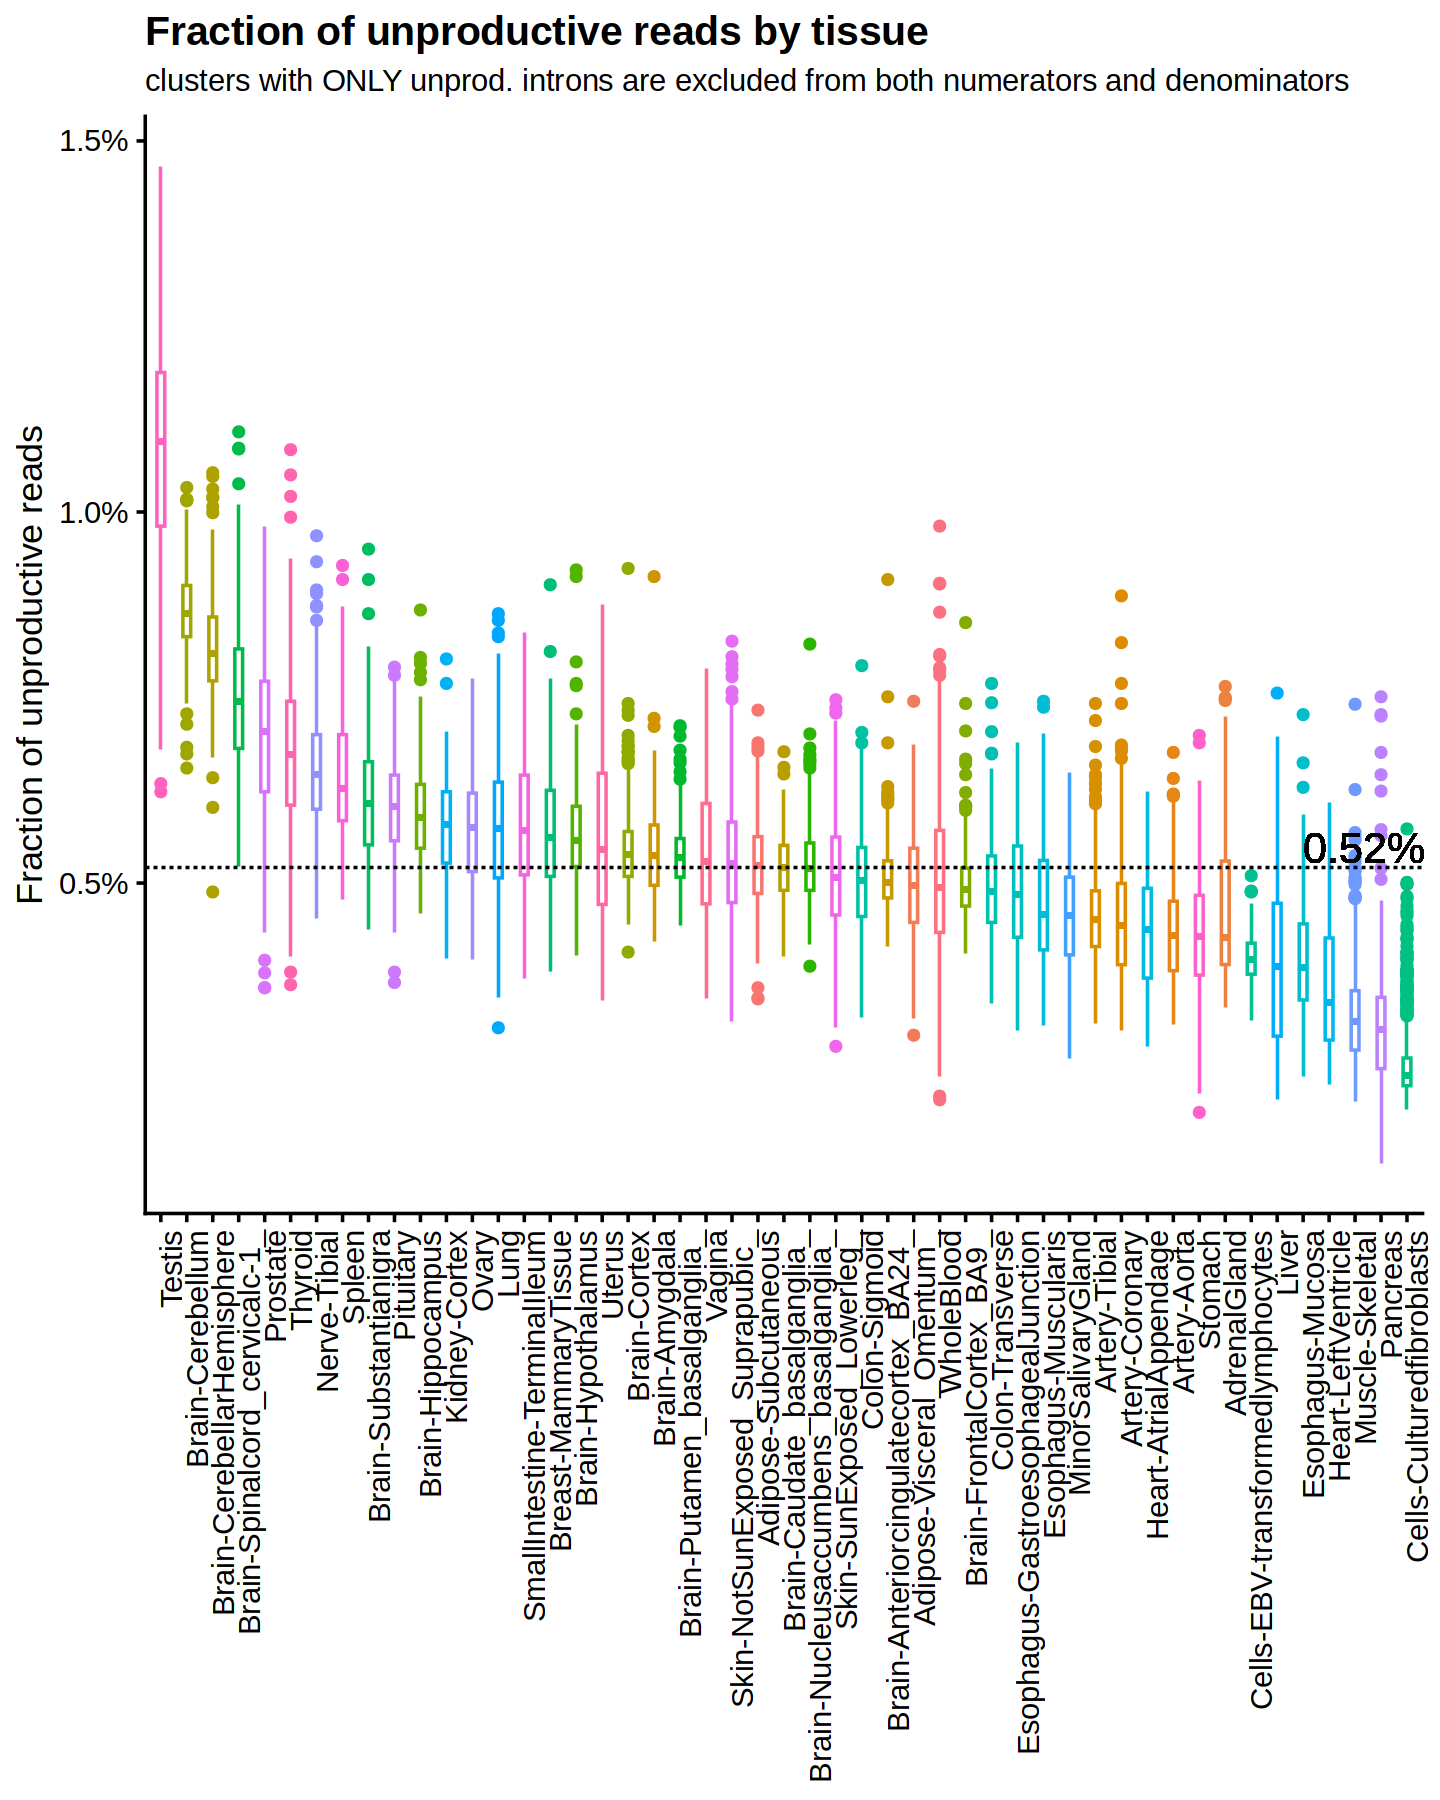

In [ ]:
#| label: fig-unprodRatio-by-tissue
#| include: true
p1

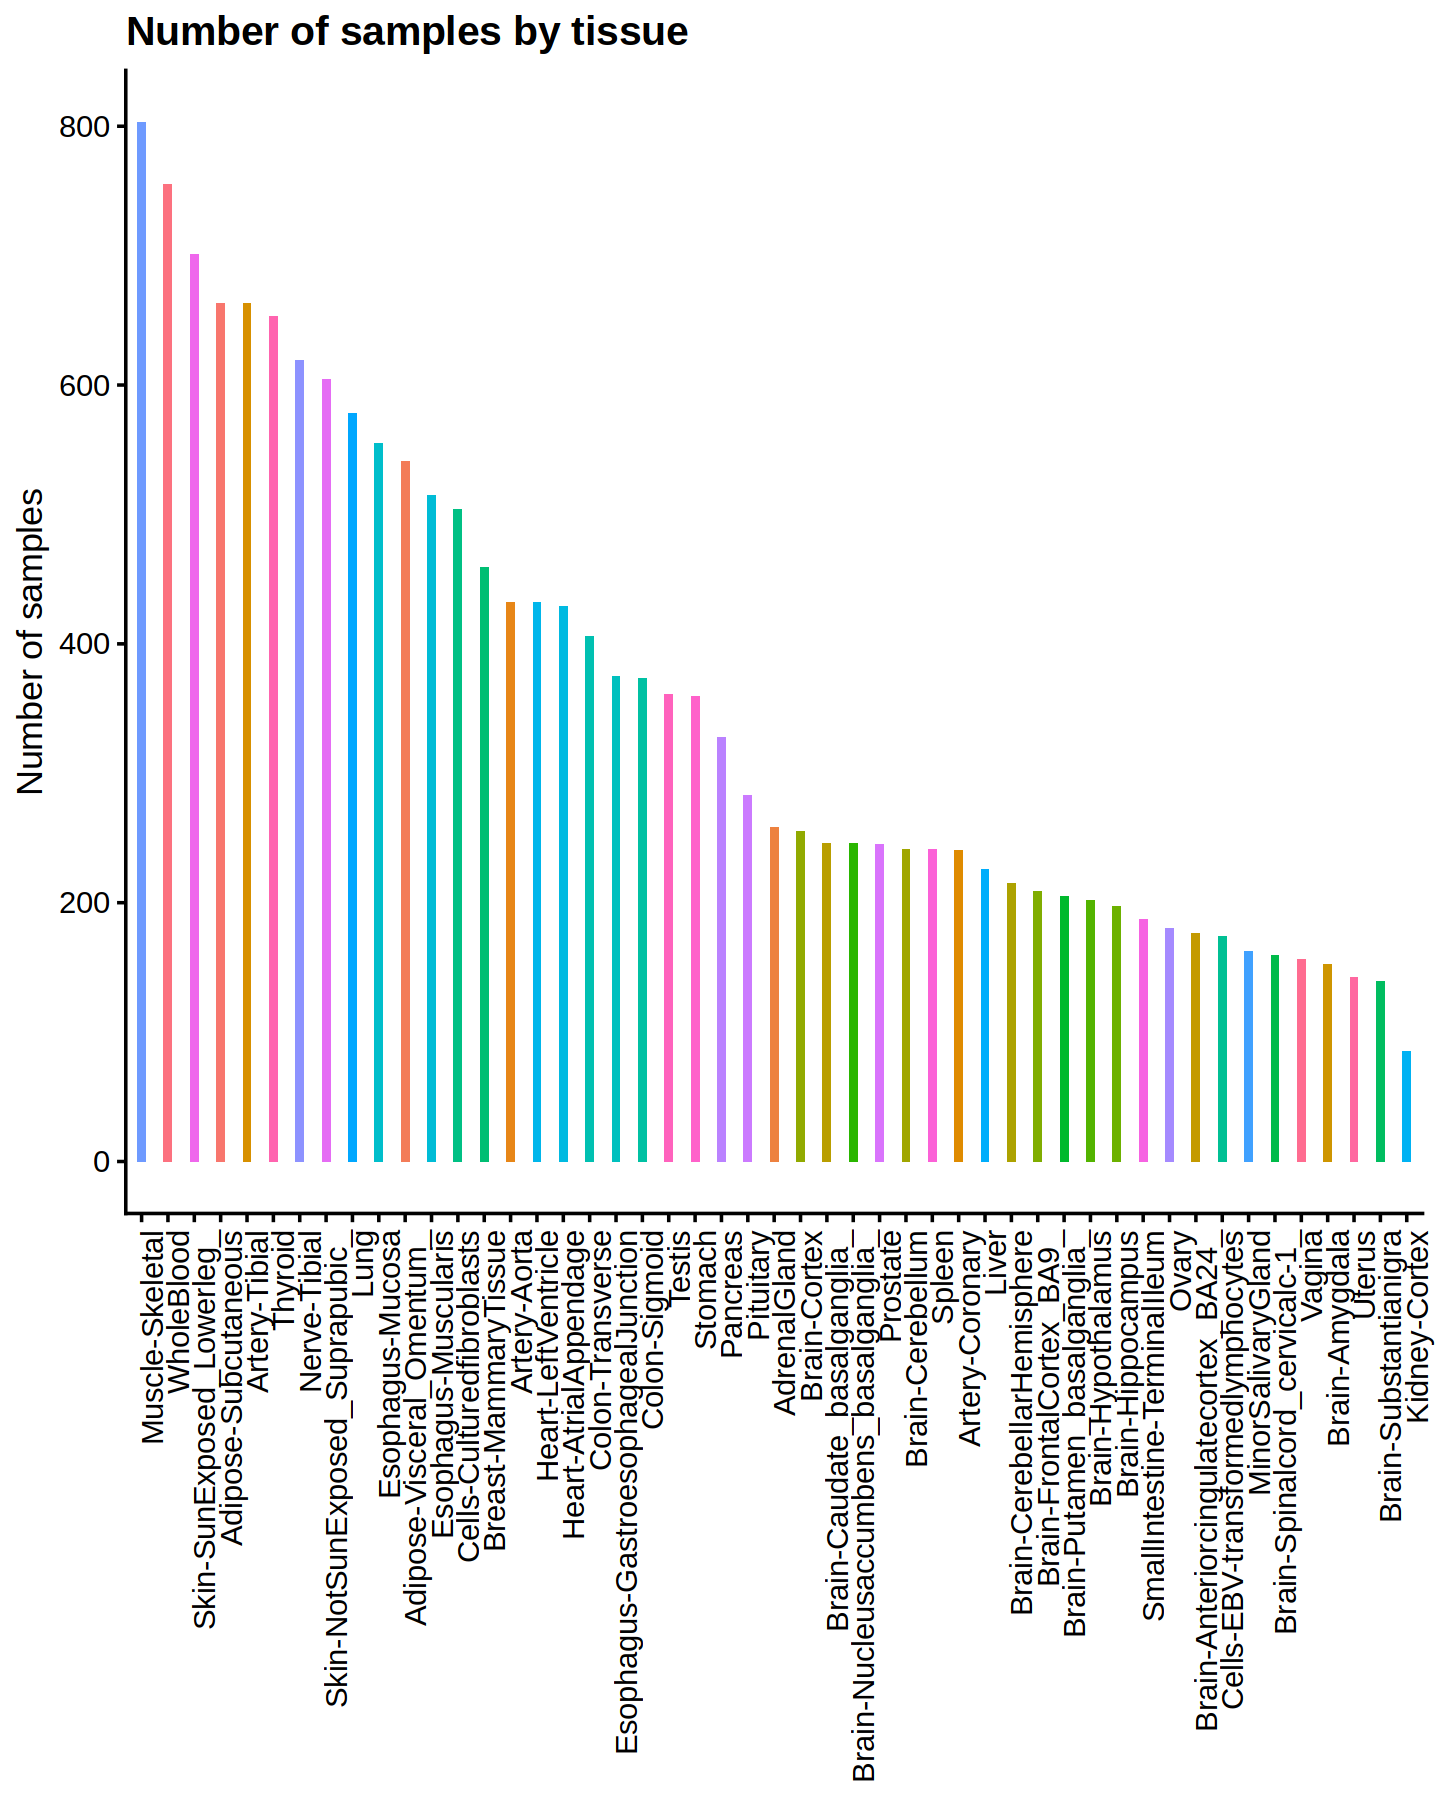

In [ ]:
#| label: fig-nsample-by-tissue
#| include: true

p2

In [ ]:
ratios[, .(sample, unprodRatio, nsample, medUnprodRatio = median(unprodRatio)), by = tissue][sample(1:17329, 10)]

tissue,sample,unprodRatio,nsample,medUnprodRatio
<chr>,<chr>,<dbl>,<int>,<dbl>
Skin-SunExposed_Lowerleg_,GTEX-1GZ2Q,0.00483,701,0.005080
WholeBlood,GTEX-ZXES,0.00488,755,0.004940
Thyroid,GTEX-NFK9,0.00770,653,0.006730
Colon-Transverse,GTEX-1JMLX,0.00655,406,0.004880
Artery-Coronary,GTEX-O5YU,0.00554,240,0.004435
Esophagus-Mucosa,GTEX-1CAMQ,0.00351,555,0.003860
Brain-Hippocampus,GTEX-1H3O1,0.00626,197,0.005890
Kidney-Cortex,GTEX-1HBPI,0.00662,85,0.005790
Brain-FrontalCortex_BA9_,GTEX-1IDJH,0.00467,209,0.004910


In [ ]:
wrap_labels  <- function(x, y = 5) {str_wrap(str_replace_all(x, "[\\-]|(_.+_)", " "), y)}
wrap_labels("thisisavery_lon_gstring-thatneedstob-ewrapped", 10) %>% cat

thisisavery
gstring
thatneedstob
ewrapped

In [ ]:
labels = ratios[, .(nsample, med = median(unprodRatio)), by = tissue] %>% unique %>% 
    .[, .(tissue, nsample, med, tid = forcats::fct_reorder(tissue, -med) %>% as.integer)] %>% 
    .[order(tid)]

head(labels)

tissue,nsample,med,tid
<chr>,<int>,<dbl>,<int>
Testis,361,0.01095,1
Brain-Cerebellum,241,0.00863,2
Brain-CerebellarHemisphere,215,0.00810,3
Brain-Spinalcord_cervicalc-1_,159,0.00744,4
Prostate,245,0.00704,5
Thyroid,653,0.00673,6


In [142]:
label_x1 <- function(ids) {
    labels[tid == ids, tissue] %>% 
        str_replace_all("[\\-]|(_.+_)", " ") %>% 
        str_wrap(25)
}

label_x2 <- function(ids) {
    labels[tid == ids, nsample] 
}

label_x1(1)
label_x2(5)

[1] "Testis"

[1] 245

In [42]:
df[1:5]

sample,unprodRatio,nsample,med,tissue,tissuei,pointx
<chr>,<dbl>,<int>,<dbl>,<fct>,<int>,<dbl>
GTEX-1C64N,0.01466,361,0.01095,Testis,1,0.00000000
GTEX-1HKZK,0.01437,361,0.01095,Testis,1,0.04315476
GTEX-1EH9U,0.01372,361,0.01095,Testis,1,0.13988095
GTEX-1LVA9,0.01371,361,0.01095,Testis,1,0.14136905
GTEX-1LB8K,0.01370,361,0.01095,Testis,1,0.14285714


In [123]:
point_scale <- function(x, newmin, newmax) {
  newmax  <- max(newmax)
  newmin  <- min(newmin)
  new_range <- abs(newmax - newmin) 
  old_range <- abs(max(x) - min(x))

  # Normalize the values between 0 and 1
  normalized_x <- (x - min(x)) / old_range

  # Scale the normalized values to the new range and offset by 0.5
  scaled_x <- normalized_x * new_range + newmin

  return(scaled_x)
}

In [122]:
point_scale(1:5, .5, 1.5)

[1] 0.50 0.75 1.00 1.25 1.50

In [124]:
df <- ratios[, .(sample, unprodRatio, nsample, med = median(unprodRatio),rk=rank(unprodRatio, ties.method = "first")), by = tissue
        ][, .(sample, unprodRatio, nsample, med, tissue = forcats::fct_reorder(tissue, -med), rk)
        ][, .(sample, tissue, unprodRatio, nsample, med, tissuei = as.integer(tissue), rk)
        ][, .(sample, unprodRatio, nsample, med, tissuei, rk, pointx = point_scale(rk, (tissuei - .5), tissuei+.5)), by = tissue
        ][order(tissuei, rk)]
df[str_detect(tissue, "Testis")]

tissue,sample,unprodRatio,nsample,med,tissuei,rk,pointx
<fct>,<chr>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>
Testis,GTEX-1JKYN,0.00623,361,0.01095,1,1,0.5000000
Testis,GTEX-1AX8Z,0.00634,361,0.01095,1,2,0.5027778
Testis,GTEX-S4Z8,0.00680,361,0.01095,1,3,0.5055556
Testis,GTEX-1QAET,0.00699,361,0.01095,1,4,0.5083333
Testis,GTEX-12BJ1,0.00703,361,0.01095,1,5,0.5111111
Testis,GTEX-117YX,0.00706,361,0.01095,1,6,0.5138889
Testis,GTEX-WY7C,0.00708,361,0.01095,1,7,0.5166667
Testis,GTEX-1C6VS,0.00711,361,0.01095,1,8,0.5194444
Testis,GTEX-1KXAM,0.00716,361,0.01095,1,9,0.5222222


In [168]:
p3 <- ggplot(df) +
        geom_point(aes(x = pointx, y = unprodRatio), color = 'midnightblue', alpha = .1) +
        geom_tile(aes(x = tissuei, y = med), color = 'firebrick', fill= 'firebrick', height = 5e-5, width = .9) +
        scale_x_continuous(
            breaks = unique(df$tissuei), labels = label_x1, expand = c(0, .5),
            sec.axis = sec_axis(~., breaks = unique(df$tissuei), labels = label_x2,
                            guide = guide_axis(angle = 0)
                            )
            ) +
        scale_y_continuous(labels = scales::percent_format(accuracy = .1)) +
        labs(x = "Tissue / Number of Samples",
            y = "Fraction of unproductive reads"
            )


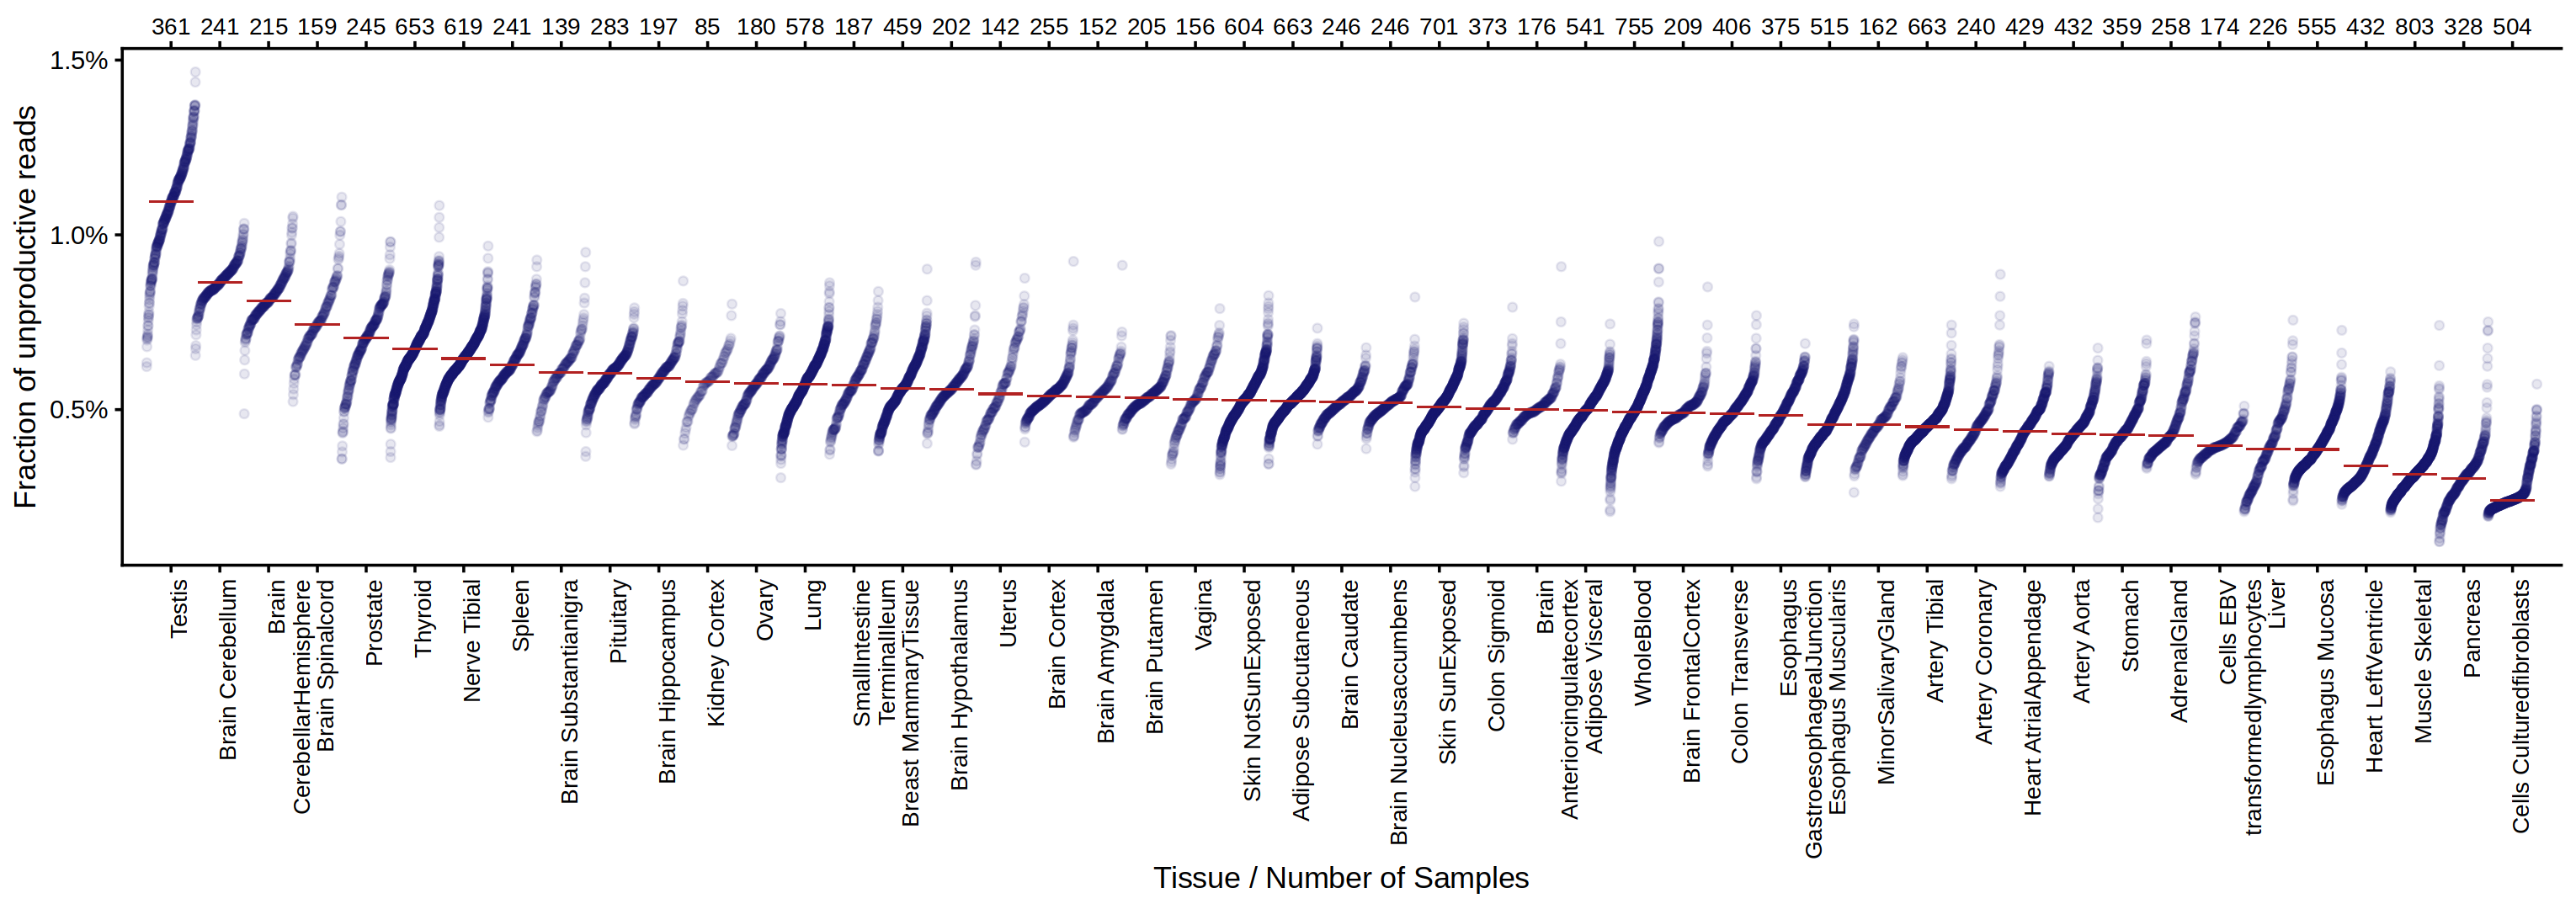

In [169]:
options(repr.plot.width = 17, repr.plot.height = 6, repr.plot.res = 180)
p3 + theme(legend.position = "none", axis.text.x = element_text(angle = 90, hjust = 1, size = 11))

In [168]:
ratios[, .(nsample, med = median(unprodRatio)), by = tissue] %>% unique %>% .[order(-med)]

tissue,nsample,med
<chr>,<int>,<dbl>
Testis,361,0.010950
Brain-Cerebellum,241,0.008630
Brain-CerebellarHemisphere,215,0.008100
Brain-Spinalcord_cervicalc-1_,159,0.007440
Prostate,245,0.007040
Thyroid,653,0.006730
Nerve-Tibial,619,0.006460
Spleen,241,0.006280
Brain-Substantianigra,139,0.006070
